# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.01
EPOCHS = 30
BATCH_SIZE = 512
MOMENTUM = 0.9


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for name in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with optimizer:" + name)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    if name == 'SGD':
        optimizer = keras.optimizers.SGD()
    elif name == 'RMSprop':
        optimizer = keras.optimizers.RMSprop()
    elif name == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad()
    else:
        optimizer = keras.optimizers.Adam()
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test))
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    # train_acc = model.history.history["acc"]
    # valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-optimizer-(name)"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss
    }
    # ,
    #                          'train-acc': train_acc,
    #                          'valid-acc': valid_acc}

3852 - val_loss: 1.7326 - val_accuracy: 0.3904
Epoch 9/30
50000/50000 [==============================] - 6s 123us/step - loss: 1.7357 - accuracy: 0.3918 - val_loss: 1.7215 - val_accuracy: 0.3895
Epoch 10/30
50000/50000 [==============================] - 6s 119us/step - loss: 1.7206 - accuracy: 0.3962 - val_loss: 1.7025 - val_accuracy: 0.4008
Epoch 11/30
50000/50000 [==============================] - 5s 109us/step - loss: 1.6984 - accuracy: 0.4059 - val_loss: 1.8085 - val_accuracy: 0.3617
Epoch 12/30
50000/50000 [==============================] - 5s 105us/step - loss: 1.6840 - accuracy: 0.4085 - val_loss: 1.6824 - val_accuracy: 0.4128
Epoch 13/30
50000/50000 [==============================] - 5s 101us/step - loss: 1.6697 - accuracy: 0.4116 - val_loss: 1.6536 - val_accuracy: 0.4247
Epoch 14/30
50000/50000 [==============================] - 5s 106us/step - loss: 1.6576 - accuracy: 0.4189 - val_loss: 1.6671 - val_accuracy: 0.4076
Epoch 15/30
50000/50000 [==============================] - 5

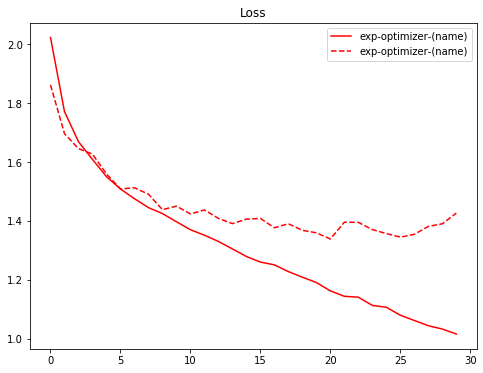

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()